# Scikit-Learn 맛보기
## iris 분류 = 결정트리, 서포트 벡터머신(SVM), 로지스틱 회귀
### 1. 데이터 전처리

In [15]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
iris = load_iris()
type(iris)

sklearn.utils.Bunch

In [4]:
#iris

In [9]:
iris.keys()  # dictionar

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [12]:
print(iris['target_names'])
print(iris.target_names ) 
# 자바스크립트의 오브젝트형태
# array임

['setosa' 'versicolor' 'virginica']
['setosa' 'versicolor' 'virginica']


In [15]:
# Feature data  : X, numpy ndarray
print(type(iris.data))
iris.data[:5]

<class 'numpy.ndarray'>


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [17]:
# Feature name
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

- 위의 두 결과를 통해 DF로 만들 수 있다

In [5]:
import pandas as pd

df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
# columns를 보기좋게 만들기
feature_names = [name[:-5] for name in iris.feature_names]
df = pd.DataFrame(iris.data, columns = feature_names)
df['target'] = iris.target  # y data
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [25]:
df.tail()

,sepal length,sepal width,petal length,petal width,target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [27]:
import numpy as np

np.unique(iris.target, return_counts = True)
# 0 1 2가 각각 50개씩 들어있음

(array([0, 1, 2]), array([50, 50, 50]))

In [29]:
# 설명
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [31]:
# 기초통계량 전체
df.groupby('target').describe()

sepal length                                             sepal width  \
              count   mean       std  min    25%  50%  75%  max       count   
target                                                                        
0              50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8        50.0   
1              50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0        50.0   
2              50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9        50.0   

               ... petal length      petal width                             \
         mean  ...          75%  max       count   mean       std  min  25%   
target         ...                                                            
0       3.428  ...        1.575  1.9        50.0  0.246  0.105386  0.1  0.2   
1       2.770  ...        4.600  5.1        50.0  1.326  0.197753  1.0  1.2   
2       2.974  ...        5.875  6.9        50.0  2.026  0.274650  1.4  1.8   

                       
        50%  75%  max  
target                 
0       0.2  0.3  0.6  
1       1.3  1.5  1.8  
2       2.0  2.3  2.5  

[3 rows x 32 columns]

In [32]:
# 원하는 요약 정보만 보기
df.groupby('target').agg(['mean', 'std'])

sepal length           sepal width           petal length            \
               mean       std        mean       std         mean       std   
target                                                                       
0             5.006  0.352490       3.428  0.379064        1.462  0.173664   
1             5.936  0.516171       2.770  0.313798        4.260  0.469911   
2             6.588  0.635880       2.974  0.322497        5.552  0.551895   

       petal width            
              mean       std  
target                        
0            0.246  0.105386  
1            1.326  0.197753  
2            2.026  0.274650

In [11]:
import matplotlib.pyplot as plt

setosa = df[df.target == 0].iloc[:,:-1]
setosa.shape

(50, 4)

In [12]:
setosa.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


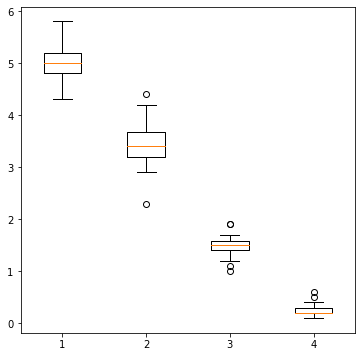

In [13]:
plt.figure(figsize = (6,6))
plt.boxplot(setosa.T)
plt.show()

## 2. train, test set 나누기

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state =2022 )
# (X data, ydata, ...)

X_train.shape, X_test.shape, y_train.shape, y_test.shape
# train : test  = 3 : 1  (75:25)

((112, 4), (38, 4), (112,), (38,))

In [64]:
# train set 도포
np.unique(y_train, return_counts=True)

(array([0, 1, 2]), array([37, 38, 37]))

#### y 값을 균등하게 뽑기 위한 stratify가 필요

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, stratify = iris.target, random_state =2022 )

np.unique(y_train, return_counts=True)

(array([0, 1, 2]), array([37, 37, 38]))

#### test_size 옵션

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, stratify = iris.target, test_size = 0.2, random_state =2022 )

np.unique(y_train, return_counts=True)

(array([0, 1, 2]), array([40, 40, 40]))

## 3. 지도학습 - 분류 

### 의사결정나무

In [21]:
from sklearn.tree import DecisionTreeClassifier

# 모델 생성
dtc = DecisionTreeClassifier(random_state = 2022)

In [22]:
# 모델 하이퍼파라미터
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 2022,
 'splitter': 'best'}

In [ ]:
# 학습 수행
dtc.fit(X_train, y_train)

#### 4. 예측 및 평가

In [24]:
# 예측
pred = dtc.predict(X_test)

# 평가
print(f'예측 정확도  : {accuracy_score(y_test, pred):.4f}')

예측 정확도  : 0.9333


In [27]:
res = pd.DataFrame({'y' : y_test, 'DT' : pred})
res.head()

,y,DT
0,2,2
1,0,0
2,1,2
3,1,1
4,0,0


#### 예측, 평가 한번에 수행

In [28]:
dtc.score(X_test, y_test)

0.9333333333333333

### SVM

In [30]:
from sklearn.svm import SVC
svc = SVC(random_state = 2022)
svc.fit(X_train, y_train)

SVC(random_state=2022)

#### 예측 및 평가

In [31]:
pred_sv = svc.predict(X_test)

In [33]:
accuracy_score(y_test, pred_sv)

0.9333333333333333

### Logistic Regression 로지스틱 회귀

In [34]:
from sklearn.linear_model import LogisticRegression

# max_iter 수정 필요
lrc = LogisticRegression(random_state = 2022, max_iter = 500)
lrc.fit(X_train, y_train)

LogisticRegression(max_iter=500, random_state=2022)

#### 예측 및 평가

In [35]:
pred_rc = lrc.predict(X_test)
accuracy_score(y_test, pred_rc)

0.9333333333333333

In [37]:
from sklearn.preprocessing import MinMaxScaler  # 최대최소 정규화

iris_scaled = MinMaxScaler().fit_transform(iris.data)  # 기존의 X data를 정규화시킴

In [38]:
iris_scaled[:5]

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667]])

In [43]:
lrc2 = LogisticRegression()

In [41]:
X_train2, X_test2, _, _ = train_test_split(
    iris_scaled, iris.target, stratify = iris.target, test_size = 0.2, random_state = 2022)

In [44]:
lrc2.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [48]:
pred_lr = lrc2.predict(X_test)
accuracy_score(y_test, pred_lr)

0.9333333333333333

## 세 가지 모델 비교

In [49]:
# 의사결정나무
print(dtc.score(X_test, y_test))

# SVM
print(svc.score(X_test, y_test))

# 로지스틱 회귀분석
print(lrc.score(X_test, y_test))

0.9333333333333333
0.9333333333333333
0.9333333333333333


In [50]:
res["SVC"] = pred_sv
res['LR'] = pred_lr
res.head()

,y,DT,SVC,LR
0,2,2,2,2
1,0,0,0,0
2,1,2,2,2
3,1,1,1,1
4,0,0,0,0
